In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

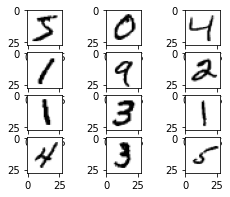

In [6]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [7]:
X_train.shape[0]

60000

In [8]:
X_test.shape[0]

10000

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
#Keras modelinin kurulması
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [14]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

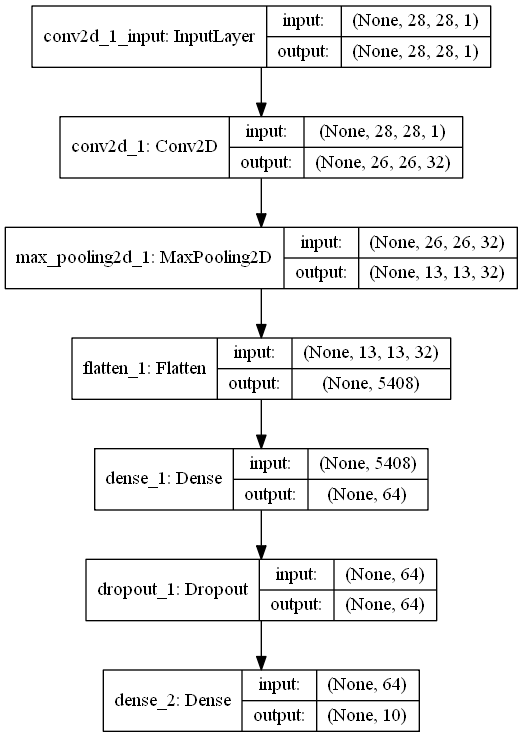

In [15]:
tf.keras.utils.plot_model(model, "AIUP_mnist.png", show_shapes = True, show_layer_names = True)

In [16]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2, #0, 1 [=======================], 2 -> Epoch 1/5
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 42s - loss: 0.3431 - accuracy: 0.8963 - val_loss: 0.1124 - val_accuracy: 0.9654
Epoch 2/5
 - 38s - loss: 0.1709 - accuracy: 0.9476 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 3/5
 - 37s - loss: 0.1331 - accuracy: 0.9594 - val_loss: 0.0731 - val_accuracy: 0.9795
Epoch 4/5
 - 36s - loss: 0.1121 - accuracy: 0.9651 - val_loss: 0.0714 - val_accuracy: 0.9787
Epoch 5/5
 - 36s - loss: 0.0985 - accuracy: 0.9692 - val_loss: 0.0846 - val_accuracy: 0.9762


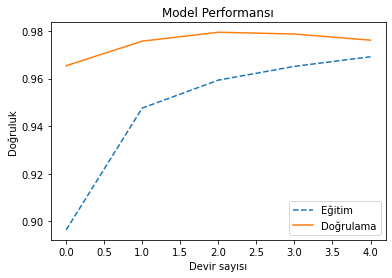

In [17]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

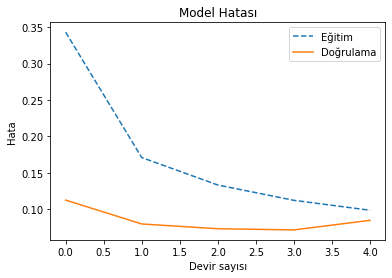

In [18]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test verisiyle model doğruluğu : %.2f" % (score[1] * 100))

Test verisiyle model doğruluğu : 97.72


In [2]:
#Tekrarlayan Sinir Ağları
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

Using TensorFlow backend.
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ITU\AppData\Roaming\Pyt

In [3]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)
print(X_train[1])

C:\Users\ITU\anaconda3\envs\tf\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


C:\Users\ITU\anaconda3\envs\tf\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print(X_train.shape)

(25000,)


In [5]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [6]:
print("Eğitim kümesinin boyutları", X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [7]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))

In [8]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


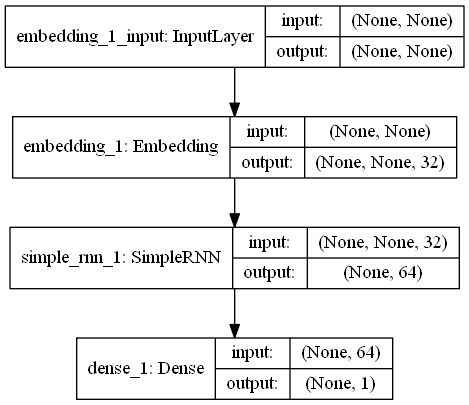

In [10]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli.png", show_shapes = True, show_layer_names = True)

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6506 - accuracy: 0.6085 - val_loss: 0.5659 - val_accuracy: 0.7016
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.4135 - accuracy: 0.8220 - val_loss: 0.4025 - val_accuracy: 0.8228
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3048 - accuracy: 0.8796 - val_loss: 0.3518 - val_accuracy: 0.8524
Epoch 4/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2444 - accuracy: 0.9081 - val_loss: 0.3431 - val_accuracy: 0.8650
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2066 - accuracy: 0.9255 - val_loss: 0.3498 - val_accuracy: 0.8552
Epoch 6/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1784 - accuracy: 0.9379 - val_loss: 0.3701 - val_accuracy: 0.8624
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/st

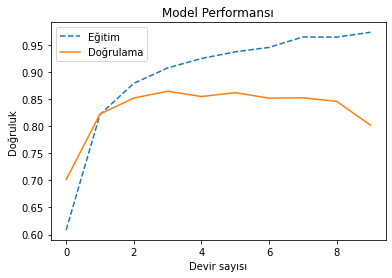

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

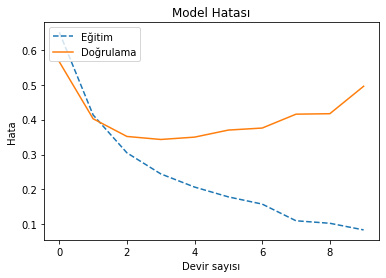

In [14]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [15]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin doğruluğu: %.2f%%" % (performans[1]*100))

Modelin doğruluğu: 80.40%


In [16]:
#LSTM 
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [17]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)
print(X_train[1])

C:\Users\ITU\anaconda3\envs\tf\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


C:\Users\ITU\anaconda3\envs\tf\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [18]:
print(X_train.shape)

(25000,)


In [19]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [20]:
print("Eğitim kümesinin boyutları", X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [21]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

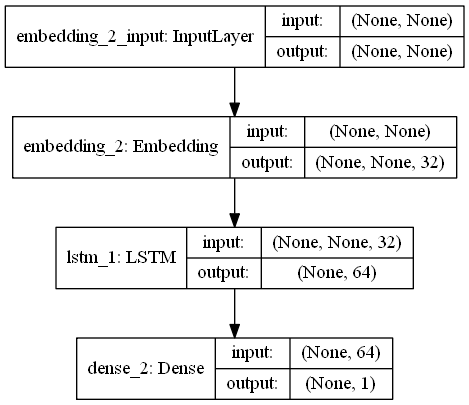

In [22]:
tf.keras.utils.plot_model(model, "LSTM-IMDB.png", show_shapes = True, show_layer_names = True)

In [23]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
    )

In [24]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.6499 - accuracy: 0.6249 - val_loss: 0.5634 - val_accuracy: 0.7986
Epoch 2/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.4712 - accuracy: 0.8209 - val_loss: 0.3778 - val_accuracy: 0.8496
Epoch 3/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.3019 - accuracy: 0.8827 - val_loss: 0.3056 - val_accuracy: 0.8744
Epoch 4/10
20000/20000 [==============================] - 161s 8ms/step - loss: 0.2390 - accuracy: 0.9114 - val_loss: 0.4266 - val_accuracy: 0.8586
Epoch 5/10
20000/20000 [==============================] - 175s 9ms/step - loss: 0.2397 - accuracy: 0.9140 - val_loss: 0.2917 - val_accuracy: 0.8810
Epoch 6/10
20000/20000 [==============================] - 184s 9ms/step - loss: 0.1911 - accuracy: 0.9316 - val_loss: 0.2908 - val_accuracy: 0.8848
Epoch 7/10
20000/20000 [==============================] - 185s 

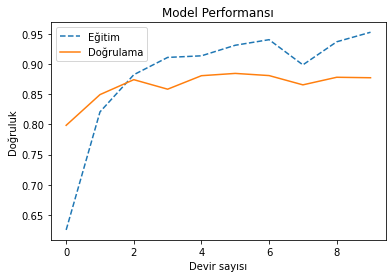

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

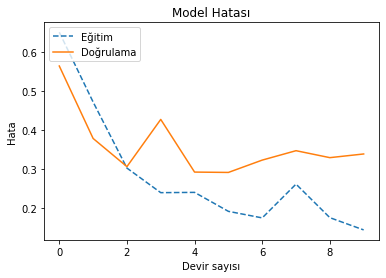

In [27]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [28]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 86.97%
